### Importing libs

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Q1: Identify and implement the appropriate non-linear spatial filter that will effectively remove the salt noise (use both build in and user defined function with 3 X3, 5 X5 and 7X 7 mask). Explain why it is better than a linear filter in this case.

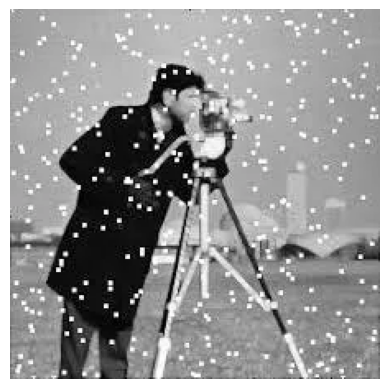

In [3]:
img_salt = cv2.imread("Set-2-Program-2-saltnoise.png")

plt.imshow(img_salt)
plt.axis('off')
plt.show()

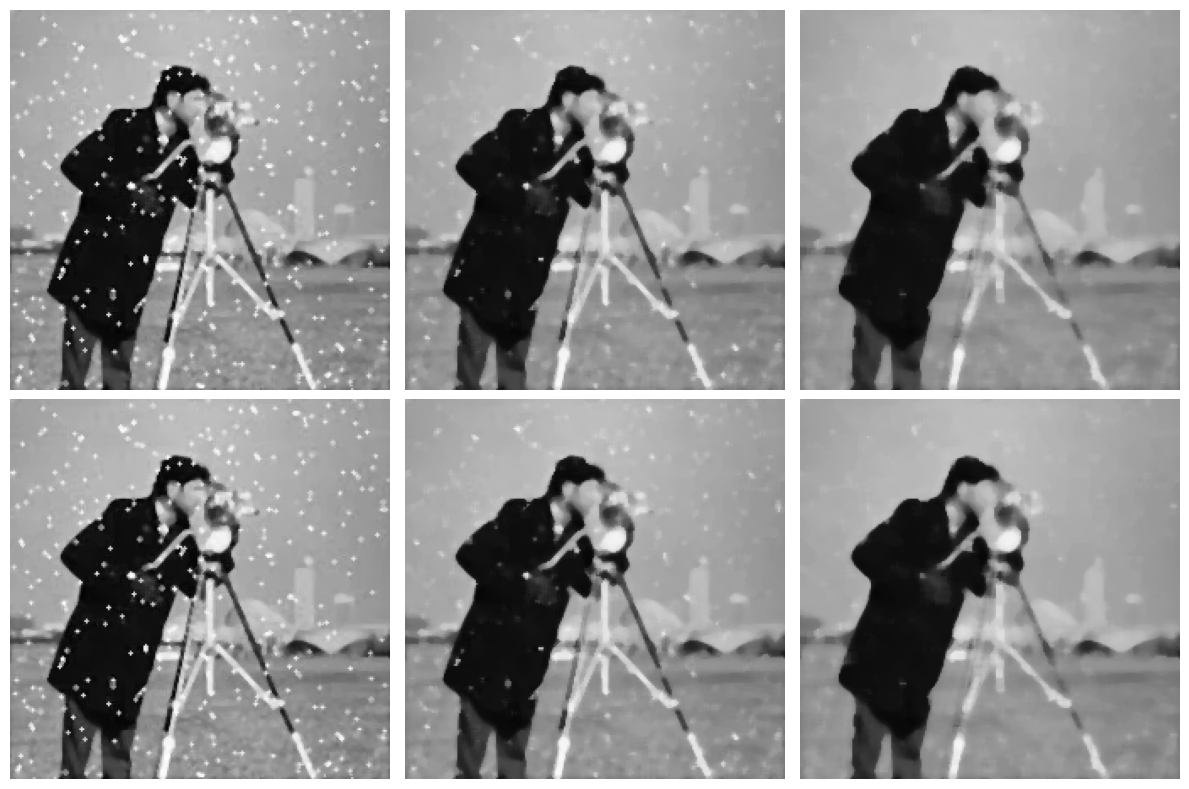

In [4]:
ks = [3,5,7]

builtins = []
for k in ks:
    builtins.append(cv2.medianBlur(img_salt, k))

manuals = []
for k in ks:
    p = k//2
    padded = np.pad(img_salt, ((p,p),(p,p),(0,0)), mode='edge')
    H,W,_ = img_salt.shape
    out = np.empty_like(img_salt)
    for i in range(H):
        for j in range(W):
            for c in range(3):
                w = padded[i:i+k, j:j+k, c].ravel()
                out[i,j,c] = np.median(w)
    manuals.append(out)

plt.figure(figsize=(12,8))
for idx,k in enumerate(ks):
    plt.subplot(2,3,idx+1)
    plt.imshow(builtins[idx])
    plt.axis('off')
    
for idx,k in enumerate(ks):
    plt.subplot(2,3,3+idx+1)
    plt.imshow(manuals[idx])
    plt.axis('off')
plt.tight_layout()
plt.show()

### Q2: Apply the appropriate non-linear spatial filter that will effectively remove the pepper noise (use both build in and user defined function with 3 X3, 5 X5 and 7X 7 mask). Explain why it is better than a linear filter in this case.

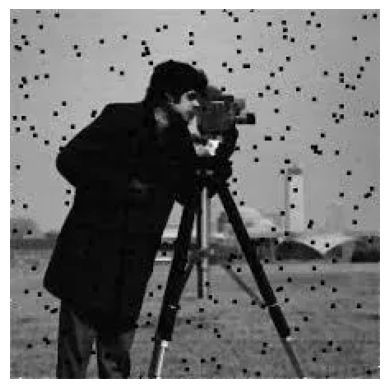

In [5]:
img_pepper = cv2.imread("Set-2-Program-2-peppernoise.png")

plt.imshow(img_pepper)
plt.axis('off')
plt.show()

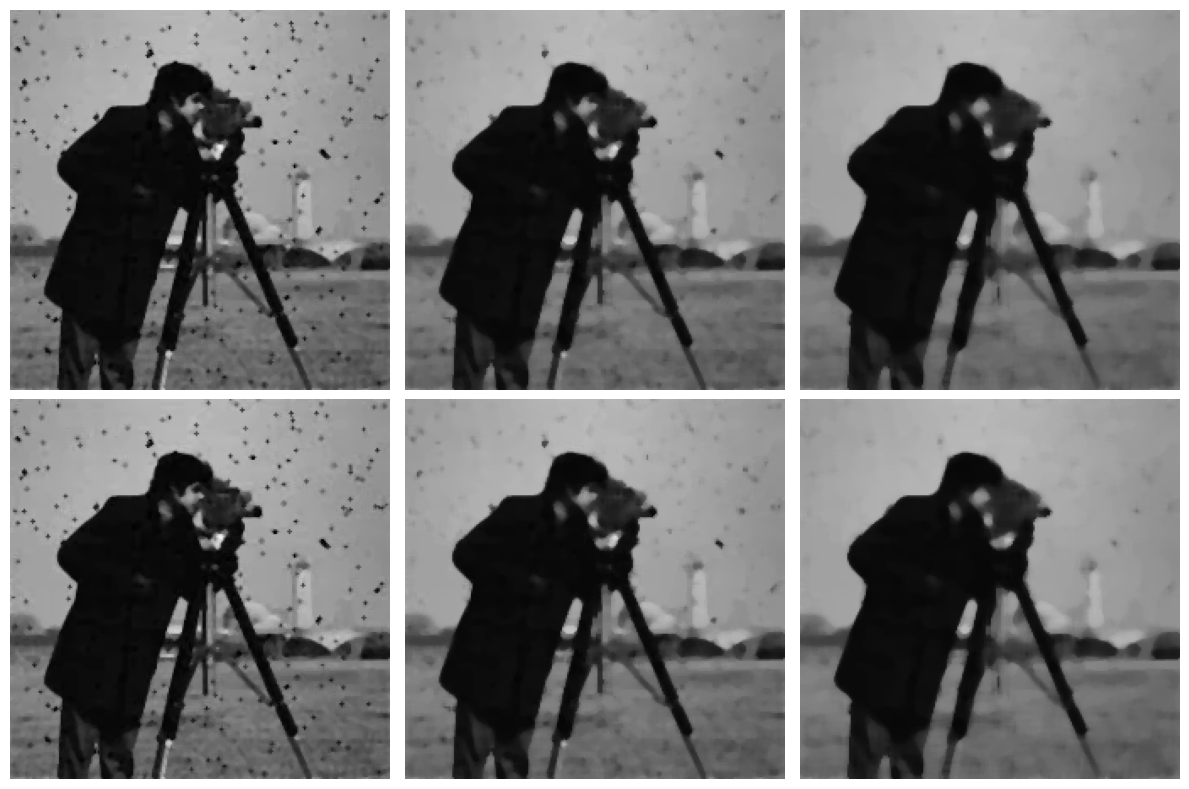

In [6]:
ks = [3,5,7]

builtins = []
for k in ks:
    builtins.append(cv2.medianBlur(img_pepper, k))

manuals = []
for k in ks:
    p = k//2
    padded = np.pad(img_pepper, ((p,p),(p,p),(0,0)), mode='edge')
    H,W,_ = img_pepper.shape
    out = np.empty_like(img_pepper)
    for i in range(H):
        for j in range(W):
            for c in range(3):
                w = padded[i:i+k, j:j+k, c].ravel()
                out[i,j,c] = np.median(w)
    manuals.append(out)

plt.figure(figsize=(12,8))
for idx,k in enumerate(ks):
    plt.subplot(2,3,idx+1)
    plt.imshow(builtins[idx])
    plt.axis('off')
    
for idx,k in enumerate(ks):
    plt.subplot(2,3,3+idx+1)
    plt.imshow(manuals[idx])
    plt.axis('off')
plt.tight_layout()
plt.show()

### Q3: Identify and implement the appropriate non-linear spatial filter that will effectively remove the salt &amp; pepper noise (use both build in and user defined function with 3 X3, 5 X5 and 7X 7 mask).

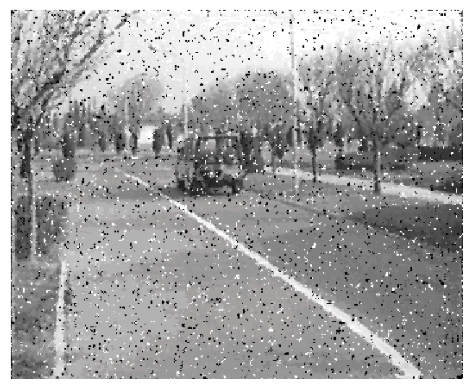

In [7]:
img_saltpepper = cv2.imread("Set-2-Program-2-Saltandpepper noise.png")

plt.imshow(img_saltpepper)
plt.axis('off')
plt.show()

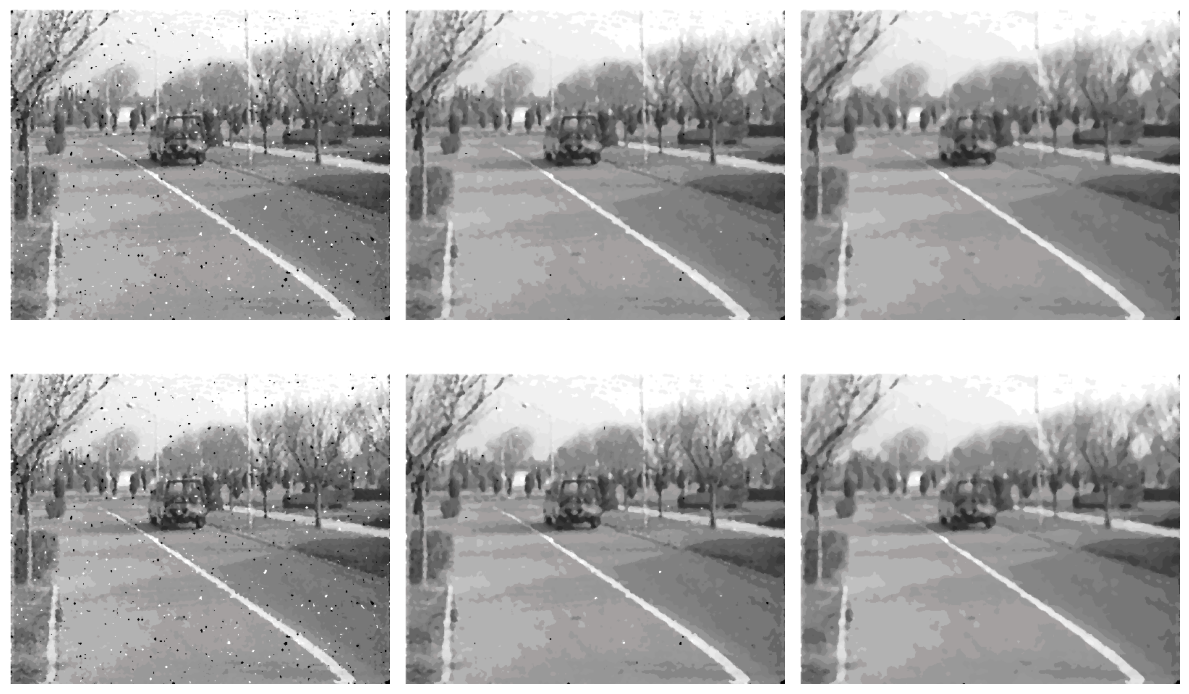

In [8]:
ks = [3,5,7]

builtins = []
for k in ks:
    builtins.append(cv2.medianBlur(img_saltpepper, k))

manuals = []
for k in ks:
    p = k//2
    padded = np.pad(img_saltpepper, ((p,p),(p,p),(0,0)), mode='edge')
    H,W,_ = img_saltpepper.shape
    out = np.empty_like(img_saltpepper)
    for i in range(H):
        for j in range(W):
            for c in range(3):
                w = padded[i:i+k, j:j+k, c].ravel()
                out[i,j,c] = np.median(w)
    manuals.append(out)

plt.figure(figsize=(12,8))
for idx,k in enumerate(ks):
    plt.subplot(2,3,idx+1)
    plt.imshow(builtins[idx])
    plt.axis('off')
    
for idx,k in enumerate(ks):
    plt.subplot(2,3,3+idx+1)
    plt.imshow(manuals[idx])
    plt.axis('off')
plt.tight_layout()
plt.show()

### Q4: Implement mid-point filter by finding the average of the maximum and minimum pixel values within the window using the below formula to remove the gaussian noise.

mp = (I1 + In) / 2

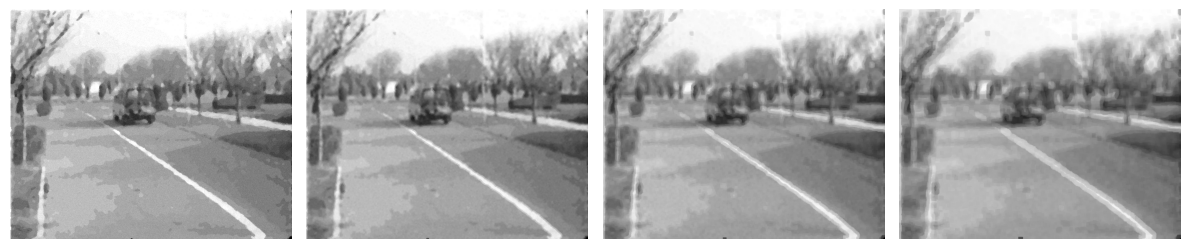

In [17]:
img = cv2.imread("Set-2-Program-2-Saltandpepper noise.png", cv2.IMREAD_GRAYSCALE)
img = cv2.medianBlur(img, 7)

def add_gaussian_noise(img, mean=0, std=1):
    gaussian = np.random.normal(mean, std, img.shape).astype(np.float32)
    return np.clip(img + gaussian, 0, 255).astype(np.uint8)

img = add_gaussian_noise(img, 12, 5)

def calculate_midpoint(window):
    return ((int(window.max()) + int(window.min())) // 2)

def long_way(window):
    mn, mx = 255, 0
    for i in window:
        for j in i:
            val = window[i, j]
            mn = min(mn, val)
            mx = max(mx, val)

H, W = img.shape
ks = [3, 5, 7]

results = []
for k in ks:
    p = k // 2
    padded = np.pad(img, ((p, p), (p, p)), mode='edge')
    out = np.empty_like(img)
    for i in range(H):
        for j in range(W):
            window = padded[i:i+k, j:j+k]
            out[i, j] = calculate_midpoint(window)
    results.append(out)

plt.figure(figsize=(12, 4))
plt.subplot(1, len(ks) + 1, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

for idx, k in enumerate(ks):
    plt.subplot(1, len(ks) + 1, idx + 2)
    plt.imshow(results[idx], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()
